In [1]:
import gym
from envs.binomial_tree import BinomialTree, decode_action 
from envs import plotting
import numpy as np
import pandas as pd
import math
from collections import defaultdict
import itertools

In [65]:
actions = np.arange(0, 1.01, step=0.1)   #vector of actions
#actions = np.array([0, 1])
print("Actions (Investment in risky asset):", actions)
lower = 90
upper = 110
delta_bin = 20
wealth_bins = [0] + np.arange(lower, upper+1, delta_bin).tolist() + [float('Inf')]  # +1 as upper limit is not included

Actions (Investment in risky asset): [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [102]:
print(env.reset())
print(env.step(10))
print(env.step(10))
print(env.V_t)

(0, 3)
((1, 5), 0, False, {})
((2, 3), 4.605170185988092, True, {})
100.0


In [4]:
def createEpsilonGreedyPolicy(Q, epsilon, num_actions): 
    """ 
    Creates an epsilon-greedy policy based 
    on a given Q-function and epsilon. 
       
    Returns a function that takes the state 
    as an input and returns the probabilities 
    for each action in the form of a numpy array  
    of length of the action space(set of possible actions). 
    """
    def policyFunction(state): 
   
        Action_probabilities = np.ones(num_actions, 
                dtype = float) * epsilon / num_actions 
                  
        best_action = np.argmax(Q[state]) 
        Action_probabilities[best_action] += (1.0 - epsilon) 
        return Action_probabilities 
   
    return policyFunction

In [157]:
def qLearning(env, num_episodes, discount_factor = 1, alpha = 0.5, epsilon = 0.95): 
    """ 
    Q-Learning algorithm: Off-policy TD control. 
    Finds the optimal greedy policy while improving 
    following an epsilon-greedy policy"""
       
    # Action value function 
    # A nested dictionary that maps 
    # state -> (action -> action-value). 
    Q = defaultdict(lambda: np.zeros(env.action_space.n)) 
   
    # Keeps track of useful statistics 
    stats = plotting.EpisodeStats( 
        episode_lengths = np.zeros(num_episodes), 
        episode_rewards = np.zeros(num_episodes))     
       
    # Create an epsilon greedy policy function 
    # appropriately for environment action space 
    policy = createEpsilonGreedyPolicy(Q, epsilon, env.action_space.n) 
       
    # For every episode
    returns=np.array([])
    terminal_wealths = np.array([])
    for ith_episode in range(num_episodes): 
           
        # Reset the environment and pick the first action 
        state = env.reset() 
           
        for t in itertools.count(): 
               
            # get probabilities of all actions from current state 
            action_probabilities = policy(state)
   
            # choose action according to  
            # the probability distribution 
            #action = np.random.choice(np.arange( 
            #          len(action_probabilities)), 
            #           p = action_probabilities) 
            action = 7
   
            # take action and get reward, transit to next state 
            next_state, reward, done, _ = env.step(action)
            #print("t: {}, V_t: {}, action: {}, next state: {}, reward {}, done {}".format(t, round(env.V_t, 2), round(decode_action(action, actions), 2), next_state, reward, done))
   
            # Update statistics 
            stats.episode_rewards[ith_episode] += reward 
            stats.episode_lengths[ith_episode] = t
               
            # TD Update 
            best_next_action = np.argmax(Q[next_state])     
            td_target = reward + discount_factor * Q[next_state][best_next_action] 
            td_delta = td_target - Q[state][action] 
            Q[state][action] += alpha * td_delta
   
            # done is True if episode terminated    
            if done: 
                returns = np.append(returns, reward)
                terminal_wealths=np.append(terminal_wealths, env.V_t)
                break
                   
            state = next_state
        
        if ith_episode % 1000 == 0:            
            print("Episode: {}, Mean Return: {}, Mean Wealth (V_T): {}, Epsilon: {}".format(ith_episode, round(returns.mean(), 3), round(terminal_wealths.mean(), 3), epsilon))
            returns = np.array([])
            terminal_wealths=np.array([])
            
        # Epsilon-Decay    
        if ith_episode % 1000 == 0:
            epsilon *= 0.95
            policy = createEpsilonGreedyPolicy(Q, epsilon, env.action_space.n) 
            
       
    return Q, stats

In [158]:
# Logarithmic Utility function
#up_prob, up_ret, down_ret, r, T, dt, V_0, actions, wealth_bins, utility
env = BinomialTree(up_prob=4/9, up_ret=1, down_ret=-1/2, r=0, T=2, dt=1, V_0=100, actions=actions, wealth_bins=wealth_bins, utility="log")
Q, stats = qLearning(env, 100000)

Episode: 0, Mean Return: 3.744, Mean Wealth (V_T): 42.25, Epsilon: 0.95
Episode: 1000, Mean Return: 4.556, Mean Wealth (V_T): 119.325, Epsilon: 0.9025
Episode: 2000, Mean Return: 4.573, Mean Wealth (V_T): 121.546, Epsilon: 0.8573749999999999
Episode: 3000, Mean Return: 4.577, Mean Wealth (V_T): 123.252, Epsilon: 0.8145062499999999
Episode: 4000, Mean Return: 4.611, Mean Wealth (V_T): 127.626, Epsilon: 0.7737809374999999
Episode: 5000, Mean Return: 4.628, Mean Wealth (V_T): 128.523, Epsilon: 0.7350918906249998
Episode: 6000, Mean Return: 4.548, Mean Wealth (V_T): 120.543, Epsilon: 0.6983372960937497
Episode: 7000, Mean Return: 4.596, Mean Wealth (V_T): 125.61, Epsilon: 0.6634204312890623
Episode: 8000, Mean Return: 4.619, Mean Wealth (V_T): 127.027, Epsilon: 0.6302494097246091
Episode: 9000, Mean Return: 4.591, Mean Wealth (V_T): 124.538, Epsilon: 0.5987369392383786
Episode: 10000, Mean Return: 4.612, Mean Wealth (V_T): 125.93, Epsilon: 0.5688000922764596
Episode: 11000, Mean Return: 4.

Episode: 89000, Mean Return: 4.638, Mean Wealth (V_T): 130.308, Epsilon: 0.009888364709658948
Episode: 90000, Mean Return: 4.608, Mean Wealth (V_T): 127.31, Epsilon: 0.009393946474176
Episode: 91000, Mean Return: 4.594, Mean Wealth (V_T): 123.93, Epsilon: 0.0089242491504672
Episode: 92000, Mean Return: 4.608, Mean Wealth (V_T): 125.326, Epsilon: 0.008478036692943839
Episode: 93000, Mean Return: 4.618, Mean Wealth (V_T): 127.73, Epsilon: 0.008054134858296647
Episode: 94000, Mean Return: 4.594, Mean Wealth (V_T): 123.93, Epsilon: 0.0076514281153818135
Episode: 95000, Mean Return: 4.601, Mean Wealth (V_T): 124.958, Epsilon: 0.0072688567096127225
Episode: 96000, Mean Return: 4.59, Mean Wealth (V_T): 124.801, Epsilon: 0.006905413874132086
Episode: 97000, Mean Return: 4.615, Mean Wealth (V_T): 126.686, Epsilon: 0.006560143180425482
Episode: 98000, Mean Return: 4.597, Mean Wealth (V_T): 124.575, Epsilon: 0.0062321360214042075
Episode: 99000, Mean Return: 4.563, Mean Wealth (V_T): 119.913, Eps

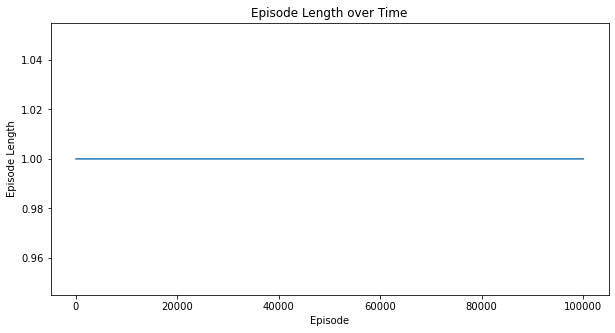

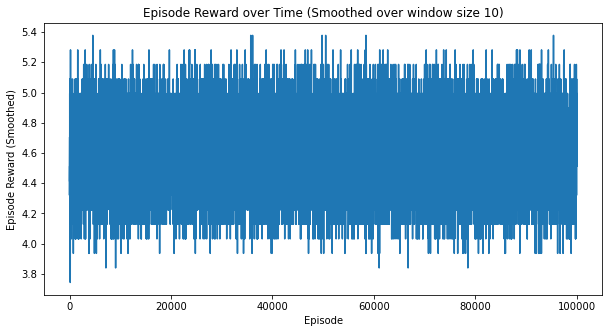

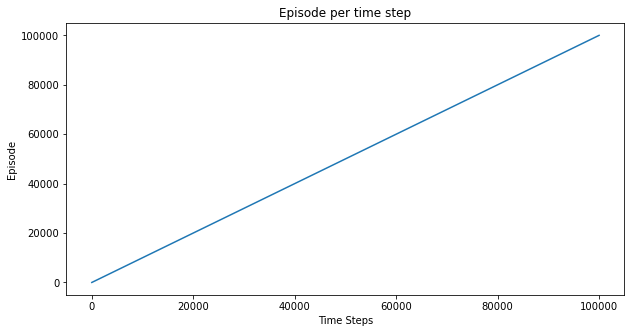

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [159]:
plotting.plot_episode_stats(stats) 

In [160]:
for key in Q.keys():
    print("Key:", key)
    print("State-Action Values:", Q[key], sep="\n")
    print("Best Action (Investment in risky asset):", decode_action(np.argmax(Q[key]), actions))

Key: (0, 1)
State-Action Values:
[0.         0.         0.         0.         0.         0.
 0.         4.26051784 0.         0.         0.        ]
Best Action (Investment in risky asset): 0.7000000000000001
Key: (1, 0)
State-Action Values:
[0.         0.         0.         0.         0.         0.
 0.         3.79122691 0.         0.         0.        ]
Best Action (Investment in risky asset): 0.7000000000000001
Key: (2, 0)
State-Action Values:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Best Action (Investment in risky asset): 0.0
Key: (2, 2)
State-Action Values:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Best Action (Investment in risky asset): 0.0
Key: (1, 2)
State-Action Values:
[0.         0.         0.         0.         0.         0.
 0.         5.42731479 0.         0.         0.        ]
Best Action (Investment in risky asset): 0.7000000000000001


In [145]:
0.95*0.95*0.95

0.8573749999999999